In [1]:
import numpy as np
from tqdm import tqdm

def fix(i, d, s, t, prevs):
    for j in range(i, d):
        #print(prevs.shape)
        #print(d)
        prevs[j, s + 1] = t
    for j in range(i):
        prevs[j, s + 1] = prevs[j, s]
    return prevs
    
def rebuilding(m, d, gamma_g, c_r, K, T, W):
    #W = np.zeros(T)
    #for i in range(len(w)):
        #W[i] = np.linalg.norm(w[i], ord = 1)
    fixes = np.zeros(d + 1)
    rounds = np.zeros(d + 1)
    prevs = np.zeros((T, d))
    prevs[:,0] = np.ones(T)
    
    k = m ** (1/d)
    for t in range(T):
        s = 0
        idx = -1
        for i in range(len(rounds)):
            if rounds[i] >= gamma_g * m/k**i:
                idx = i
                break
        if idx > -1:
            if s + 1 < d:
                prevs = fix(idx, d, s, t, prevs) #fixing smallest level i such that round_i >= \gamma_g * m/k**i
                s += 1
                fixes[idx:] = 0
                rounds[idx:] = 0
                # for j in range(idx, len(fixes)):
                #     fixes[j] = 0
                #     rounds[j] = 0
        #print(np.sum(prevs[s]))
        #print(W[t])
        while s < len(prevs) and np.sum(prevs[s]) > 2 * (d + 1) * W[t]: #Adversary forces fixing step
            K_indices = np.where(fixes == 2*K)[0]
            if len(K_indices) == 0:
                i = 0
            else:
                for j in equal_indices:
                    if np.all(fixes[j + 1:] == 2*K):
                        i = j
                        break
            # for i in range(len(fixes)):
            #     if fixes[i] != 2*K:
            #         break
                # else:
                #     i += 1
            if s + 1 < d:
                prevs = fix(i, d, s, t, prevs)
            s += 1
        
        rounds += 1
    return prevs

In [2]:
time_bounds = []
import time
durations = []
for m in tqdm(range(8, 65)):
    #m = 50
    d = int(5*np.log(m) ** (1/8))

    #w = np.random.randn(10, 10)
    hi = 1000
    K = int(np.log(hi)) + 1
    gamma_g = np.exp(-np.log(m) ** (7/8) * np.log(np.log(m)))
    C_r = np.exp(np.log(m) ** (7/8) * np.log(np.log(m))) 
    Q = m * C_r
    T = int((m + Q) * C_r)
    W = np.random.uniform(1, hi, size = T)
    time_bounds.append(C_r * K * d/(gamma_g) * (m +T))
    start = time.time()
    prevs = rebuilding(m, d, gamma_g, C_r, K, T, W)
    end = time.time()
    durations.append(end - start)

100%|██████████| 57/57 [07:04<00:00,  7.45s/it]


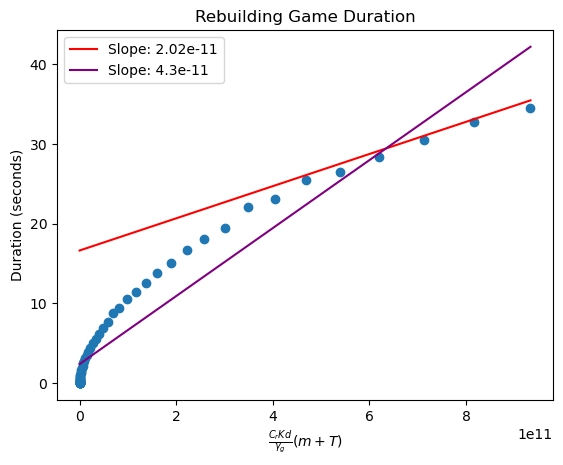

In [9]:
import matplotlib.pyplot as plt

plt.scatter(np.array(time_bounds), np.array(durations))
best_fit_slope, _ = np.polyfit(time_bounds, durations, 1)
plt.xlabel(r'$\frac{C_r K d}{\gamma_g}(m + T)$')
plt.ylabel('Duration (seconds)')
plt.title('Rebuilding Game Duration')
slope = round((durations[-1] - durations[-5])/(time_bounds[-1] - time_bounds[-5]), 14)
y_int = durations[-1] - slope * time_bounds[-1] + 1
plt.plot(time_bounds, slope*np.array(time_bounds) + y_int, color='red', linestyle='-', label=f'Slope: {slope}')
plt.plot(time_bounds, np.poly1d(np.polyfit(time_bounds, durations, 1))(time_bounds), color = 'purple', label = f'Slope: {round(best_fit_slope, 12)}')
plt.legend()
plt.show()